In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:

labels = np.load("data/CIFAR-10-C/labels.npy").squeeze()[:10000]

In [3]:
f_star = [-3.5 for _ in range(10)]
f_star.append(0)

(6,)
(6,)
(6,)
(6,)
(6,)


Text(0.5, 1.0, 'CIFAR-10-C')

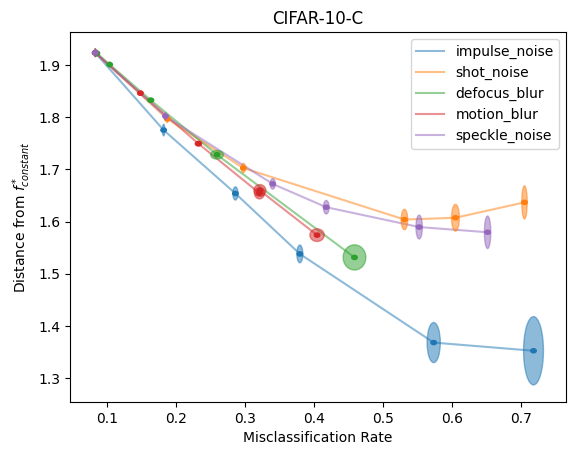

In [10]:
corruption_types = ["impulse_noise", "shot_noise", "defocus_blur", "motion_blur", "speckle_noise"]
run_names = ["rl_mc4_seed1", "rl_mc4_seed2", "rl_mc4_seed3", "rl_mc4_seed4", "rl_mc4_seed5"]

from matplotlib.patches import Ellipse
plt.figure()
ax = plt.gca()
colors = ["C0", "C1", "C2", "C3", "C4", "C5"]

for corruption_type_idx in range(len(corruption_types)):
    corruption_type = corruption_types[corruption_type_idx]
    accuracies_all = []
    dist_from_f_starts_all = []
    for run_name in run_names:
        with open("data/"+run_name+"/outputs_"+corruption_type+'.pkl', 'rb') as f:
            data = pickle.load(f)

        accuracies = []
        dist_from_f_starts = []
        for corruption_level in range(6):
            dist_from_f_start = ((data[corruption_level] - np.expand_dims(f_star, axis=0))**2).mean()
            accuracy = (data[corruption_level][:, :-1].argmax(axis=-1)==labels).mean()
            accuracies.append(accuracy)
            dist_from_f_starts.append(dist_from_f_start)
        accuracies_all.append(accuracies)
        dist_from_f_starts_all.append(dist_from_f_starts)
    accuracies_all = np.array(accuracies_all)
    dist_from_f_starts_all = np.array(dist_from_f_starts_all)
    # plt.plot(1-np.array(accuracies_all.mean(axis=0)), dist_from_f_starts_all.mean(axis=0), "o-", label=corruption_type)
    # #plot error bars
    # plt.fill_between(1-np.array(accuracies_all.mean(axis=0)), dist_from_f_starts_all.mean(axis=0)-dist_from_f_starts_all.std(axis=0), dist_from_f_starts_all.mean(axis=0)+dist_from_f_starts_all.std(axis=0), alpha=0.2)
    plt.plot(1-np.array(accuracies_all.mean(axis=0)), dist_from_f_starts_all.mean(axis=0), c = colors[corruption_type_idx], alpha=0.5, zorder=-1, label=corruption_type)
    print(accuracies_all.mean(axis=0).shape)
    for i in range(6):
        ellipse = Ellipse(xy=(1-accuracies_all.mean(axis=0)[i], dist_from_f_starts_all.mean(axis=0)[i]), width=accuracies_all.std(axis=0)[i], height=dist_from_f_starts_all.std(axis=0)[i], color=colors[corruption_type_idx], alpha=0.5)
                                # edgecolor='r', fc='None', lw=2)
        ax.add_patch(ellipse, )
        r = 0.004
        ellipse = Ellipse(xy=(1-accuracies_all.mean(axis=0)[i], dist_from_f_starts_all.mean(axis=0)[i]), width=r*2, height=r*2, color=colors[corruption_type_idx])
                                # edgecolor='r', fc='None', lw=2)
        ax.add_patch(ellipse, )

plt.legend()
plt.xlabel("Misclassification Rate")
plt.ylabel("Distance from $f^*_{constant}$")
plt.title("CIFAR-10-C")




